In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np

In [29]:
IMG_SIZE = (224, 224)  # ResNet expects 224x224
BATCH_SIZE = 32

In [30]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle = True
)

Found 557 files belonging to 2 classes.


In [31]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/test',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 140 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [33]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import preprocess_input

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    layers.Lambda(preprocess_input),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

In [36]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)


In [37]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/20

18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 645ms/step - accuracy: 0.9174 - loss: 0.1787 - val_accuracy: 0.9143 - val_loss: 0.2071 - learning_rate: 0.0010
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 582ms/step - accuracy: 0.9623 - loss: 0.0979 - val_accuracy: 0.8857 - val_loss: 0.4760 - learning_rate: 0.0010
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 587ms/step - accuracy: 0.9803 - loss: 0.0330 - val_accuracy: 0.9571 - val_loss: 0.1297 - learning_rate: 0.0010
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 598ms/step - accuracy: 0.9892 - loss: 0.0426 - val_accuracy: 0.9429 - val_loss: 0.1576 - learning_rate: 0.0010
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.9942 - loss: 0.0130
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 613ms/step - accuracy: 0.9946 - loss: 0.0123 - val_accuracy: 0.9429 - val_loss: 0.1479 - learning_rate: 0.0010
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9982 - loss: 0.0056

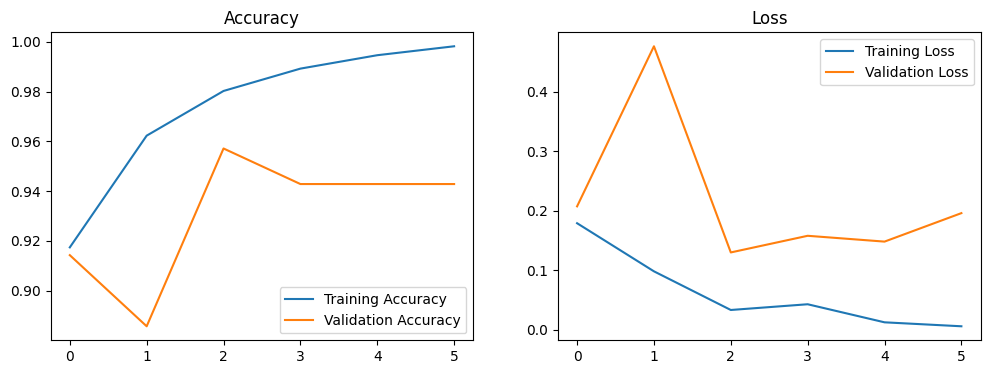

In [38]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [39]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 972ms/step - accuracy: 0.9571 - loss: 0.1297
Validation Accuracy: 95.71%
